# Self-Driving Car Engineer Nanodegree


## Project: **Vehicle Detection** 
***

---

## Import Packages

In [1]:
#importing some useful packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import hog
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
# NOTE: the next import is only valid 
# for scikit-learn version <= 0.17
# if you are using scikit-learn >= 0.18 then use this:
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from scipy.ndimage.measurements import label
%matplotlib inline


## Test Images

Build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [2]:
import os
import glob
dirs = os.listdir("data/vehicles/")
cars = []
print(dirs)
for image_type in dirs:
    cars.extend(glob.glob('data/vehicles/'+ image_type+'/*'))
    
print('Number of Vehicles Images found', len(cars))

with open('data/vehicles/cars.txt', 'w') as f:
    for fn in cars:
        f.write(fn+'\n')


dirs = os.listdir("data/non-vehicles/")
notcars = []
print(dirs)
for image_type in dirs:
    notcars.extend(glob.glob('data/non-vehicles/'+ image_type+'/*'))
    
print('Number of Non-Vehicles Images found', len(notcars))

with open('data/non-vehicles/notcars.txt', 'w') as f:
    for fn in notcars:
        f.write(fn+'\n')


['.DS_Store', 'cars.txt', 'GTI_Far', 'GTI_Left', 'GTI_MiddleClose', 'GTI_Right', 'KITTI_extracted']
Number of Vehicles Images found 8792
['.DS_Store', 'Extras', 'GTI', 'notcars.txt']
Number of Non-Vehicles Images found 8968


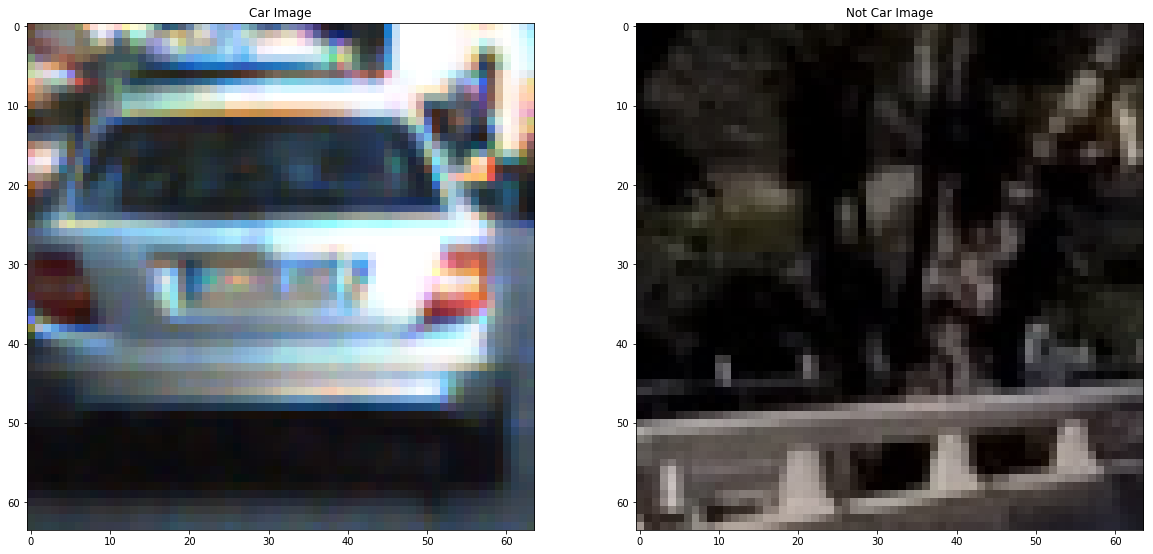

In [76]:
from vehicle_detection import Vehicle_Detection
vd = Vehicle_Detection(ystart=336,threshold_factor=10, heat_threshold=12, window=64, scales=[1.5,2,2.5])
# Choose random car / not-car indices
car_ind = np.random.randint(0,len(cars))
notcar_ind = np.random.randint(0,len(notcars))

# Read in car / not-car image
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])

# Define feature parameters
color_space = 'RGB' # #ANY OTHER
orient = 9
pix_per_call = 8
cell_per_block =2
hog_channel =0
spacial_size = (16,16)
hist_bins = 16
spacial_feat = True
hist_feat = True
hog_feat = True

images = [car_image, notcar_image]
titles = ['Car Image', 'Not Car Image']
fig = plt.figure(figsize=(20,10))
vd.visualise(fig,1,2,images,titles)


/Applications/anaconda/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


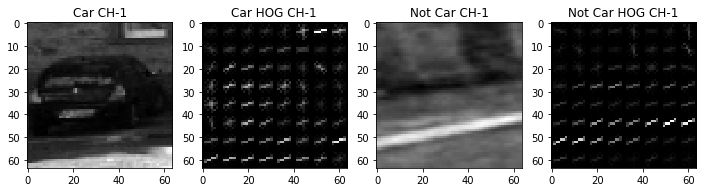

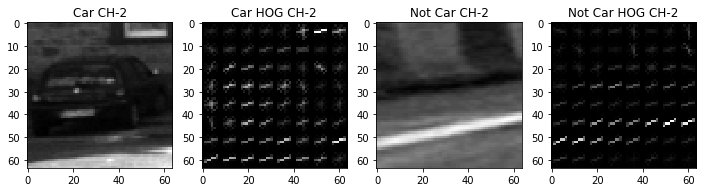

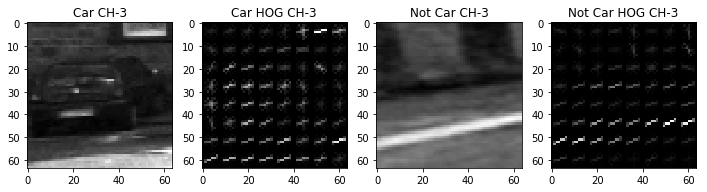

In [16]:
# from vehicle_detection import Vehicle_Detection
# vd = Vehicle_Detection(ystart=336,threshold_factor=10, heat_threshold=15, window=64)
# Choose random car / not-car indices
car_ind = np.random.randint(0,len(cars))
notcar_ind = np.random.randint(0,len(notcars))

# Read in car / not-car image
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])

# Define feature parameters
color_space = 'RGB' # #ANY OTHER
orient = 9
pix_per_call = 8
cell_per_block =2
hog_channel =0
spacial_size = (16,16)
hist_bins = 16
spacial_feat = False
hist_feat = False
hog_feat = True

car_features, car_hog_image = vd.single_img_features_test(car_image, color_space=color_space, spatial_size=spacial_size,
                            hist_bins=hist_bins, orient=orient, 
                            pix_per_cell=pix_per_call, cell_per_block=cell_per_block, hog_channel=hog_channel,
                            spatial_feat=spacial_feat, hist_feat=hist_feat, hog_feat=hog_feat)

notcar_features, notcar_hog_image = vd.single_img_features_test(notcar_image, color_space=color_space, spatial_size=spacial_size,
                            hist_bins=hist_bins, orient=orient, 
                            pix_per_cell=pix_per_call, cell_per_block=cell_per_block, hog_channel=hog_channel,
                            spatial_feat=spacial_feat, hist_feat=hist_feat, hog_feat=hog_feat)
car_ch = car_image[:, :, hog_channel]
notcar_ch = notcar_image[:, :, hog_channel]
images = [car_ch, car_hog_image, notcar_ch, notcar_hog_image]
titles = ['Car CH-1', 'Car HOG CH-1', 'Not Car CH-1', 'Not Car HOG CH-1']
fig = plt.figure(figsize=(12,3))
vd.visualisex(fig,1,4,images,titles)

car_ch = car_image[:, :, 1]
notcar_ch = notcar_image[:, :, 1]
images = [car_ch, car_hog_image, notcar_ch, notcar_hog_image]
titles = ['Car CH-2', 'Car HOG CH-2', 'Not Car CH-2', 'Not Car HOG CH-2']
fig = plt.figure(figsize=(12,3))
vd.visualisex(fig,1,4,images,titles)

car_ch = car_image[:, :, 2]
notcar_ch = notcar_image[:, :, 2]
images = [car_ch, car_hog_image, notcar_ch, notcar_hog_image]
titles = ['Car CH-3', 'Car HOG CH-3', 'Not Car CH-3', 'Not Car HOG CH-3']
fig = plt.figure(figsize=(12,3))
vd.visualisex(fig,1,4,images,titles)
# f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12,3))
# ax1.imshow(car_image)
# ax1.set_title('Car Image', fontsize=10)
# ax2.imshow(car_hog_image, cmap='hot')
# ax2.set_title('Car HOG Image', fontsize=10)

# ax3.imshow(notcar_image)
# ax3.set_title('Not Car Image', fontsize=10)
# ax4.imshow(notcar_hog_image, cmap='hot')
# ax4.set_title('Not Car HOG Image', fontsize=10)

In [4]:
import time
import pickle
# vd = Vehicle_Detection()

# Define feature parameters
color_space = 'YCrCb' # #ANY OTHER
orient = 9
pix_per_cell = 8
cell_per_block =2
hog_channel ='ALL'
spatial_size = (16,16)
hist_bins = 16
spatial_feat = True
hist_feat = True
hog_feat = True

dist_pickle = pickle.load( open("model/dist_pickle.p", "rb" ) )
svc = dist_pickle["clf"]
X_scaler = dist_pickle["scaler"]
orient = dist_pickle["orient"]
pix_per_cell = dist_pickle["pix_per_cell"]
cell_per_block = dist_pickle["cell_per_block"]
spatial_size = dist_pickle["spatial_size"]
hist_bins = dist_pickle["hist_bins"]


['.DS_Store', 'Extras', 'GTI', 'notcars.txt']
0.391143798828125  Seconds to run, total windos =  294
0.34041595458984375  Seconds to run, total windos =  294
0.3347630500793457  Seconds to run, total windos =  294
0.3140878677368164  Seconds to run, total windos =  294
0.38533687591552734  Seconds to run, total windos =  294
0.3253641128540039  Seconds to run, total windos =  294


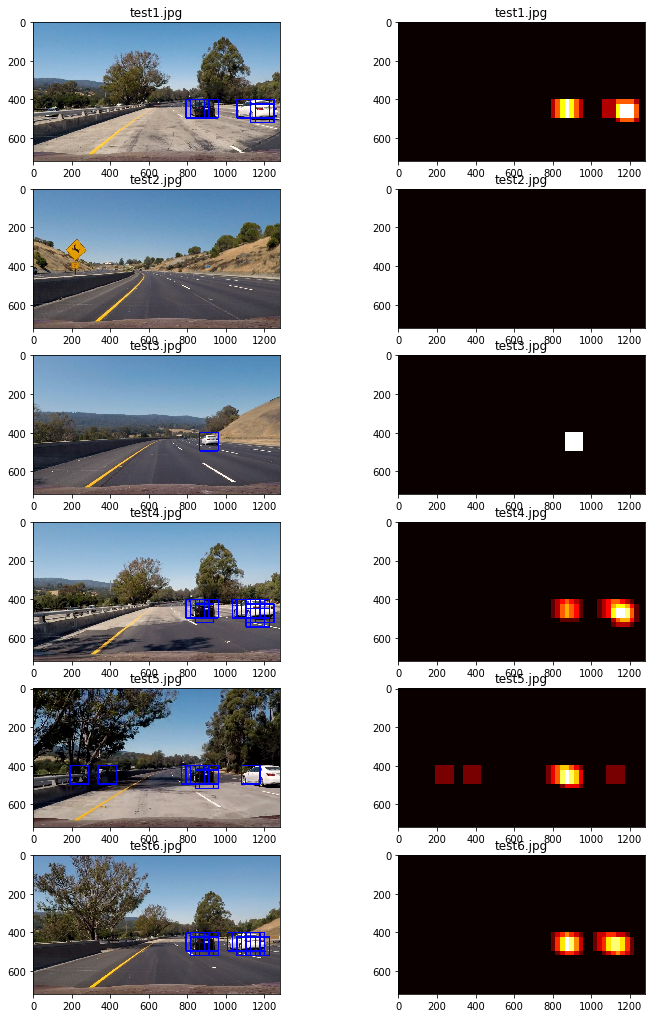

In [48]:
import os
import warnings
warnings.filterwarnings('ignore')
print(dirs)
image_files = glob.glob('test_images/test*.jpg')

out_images = []
out_map = []
out_titles =[]
out_boxes = []
#consider a narrower swath in y
y_start_stop = [400, 656]
scale = 1.5
# Iterate over test images
for img_src in image_files:
    img_boxes =[]
    t=time.time()
    count = 0
    img = mpimg.imread(img_src)
    draw_img = np.copy(img)
    # Make a heatmap of zero
    heatmap = np.zeros_like(img[:,:,0])
    img = img.astype(np.float32)/255
    img_tosearch = img[y_start_stop[0]:y_start_stop[1],:,:]
    ctrans_tosearch = vd.convert_color(img_tosearch, conv='RGB2YCrCb')
    if(scale != 1):
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, ((np.int(imshape[1]/scale)),(np.int(imshape[0]/scale))))
    
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]
    
    # Define blocks and steps as above
    nxblocks = np.int((ch1.shape[1]//pix_per_cell) - 1)
    nyblocks = np.int((ch1.shape[0]//pix_per_cell) - 1)
    
    nfeat_per_window = orient*cell_per_block**2
    window = 64
    nblocks_per_window = (window//pix_per_cell) -1
    cells_per_step = 2 # Instead of overlap define howmany cells to step
    nxsteps = (nxblocks - nblocks_per_window)//cells_per_step
    nysteps = (nyblocks - nblocks_per_window)//cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = vd.get_hog_features(ch1, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=False)
    hog2 = vd.get_hog_features(ch2, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=False)    
    hog3 = vd.get_hog_features(ch3, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=False)
    
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            count += 1
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel()
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel()
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel()
            hog_features = np.hstack((hog_feat1,hog_feat2,hog_feat3))
            
            xleft= xpos*pix_per_cell
            ytop= ypos*pix_per_cell
            
            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window,xleft:xleft+window], (64,64))
            
            # Get color features
            spatial_features = vd.bin_spatial(subimg, size=spatial_size)
            hist_features = vd.color_hist(subimg, nbins=hist_bins)
            
            # Scale features and make a prediction 
            test_features = X_scaler.transform(np.hstack((spatial_features,hist_features,hog_features)))
            test_prediction = svc.predict(test_features)
            
            if(test_prediction == 1):
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img, (xbox_left, ytop_draw+y_start_stop[0]),(xbox_left+win_draw,ytop_draw+win_draw+y_start_stop[0]),(0, 0, 255),6)
                img_boxes.append(((xbox_left, ytop_draw+y_start_stop[0]),(xbox_left+win_draw,ytop_draw+win_draw+y_start_stop[0])))
                heatmap[ytop_draw+y_start_stop[0]:ytop_draw+win_draw+y_start_stop[0], xbox_left:xbox_left+win_draw] += 1
            
    print(time.time()-t, ' Seconds to run, total windos = ', count)
    cv2.imwrite('output_images/'+ img_src.split('/')[1], draw_img)
    out_images.append(draw_img)
    out_titles.append(img_src[12:])
    out_titles.append(img_src[12:])
    out_images.append(heatmap)
    out_boxes.append(img_boxes)

#             f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
#             ax1.imshow(draw_img)
#             ax1.set_title('Boxes Image', fontsize=30)
#             plt.imshow(heatmap, cmap='hot')
#             ax2.set_title('Heat Map', fontsize=30)
                
            
fig = plt.figure(figsize=(12,24))
vd.visualise(fig,8,2,out_images,out_titles)


In [49]:
# ystart = [400,400,390,370]
# ystop = [464,518,646,646]
# scale = 1.5
# windows_sizes = [64,128,192,256]

# image = mpimg.imread('test_images/test6.jpg')
# for i in range(len(windows_sizes)):
#     out_img, hot_windows, all_windows = find_cars(image, ystart[i], ystop[i], scale, clf, train_scaler, orient, pix_per_cell, cell_per_block, spatial, histbins,windows_sizes[i])
#     plt.imshow(out_img)
#     plt.show()

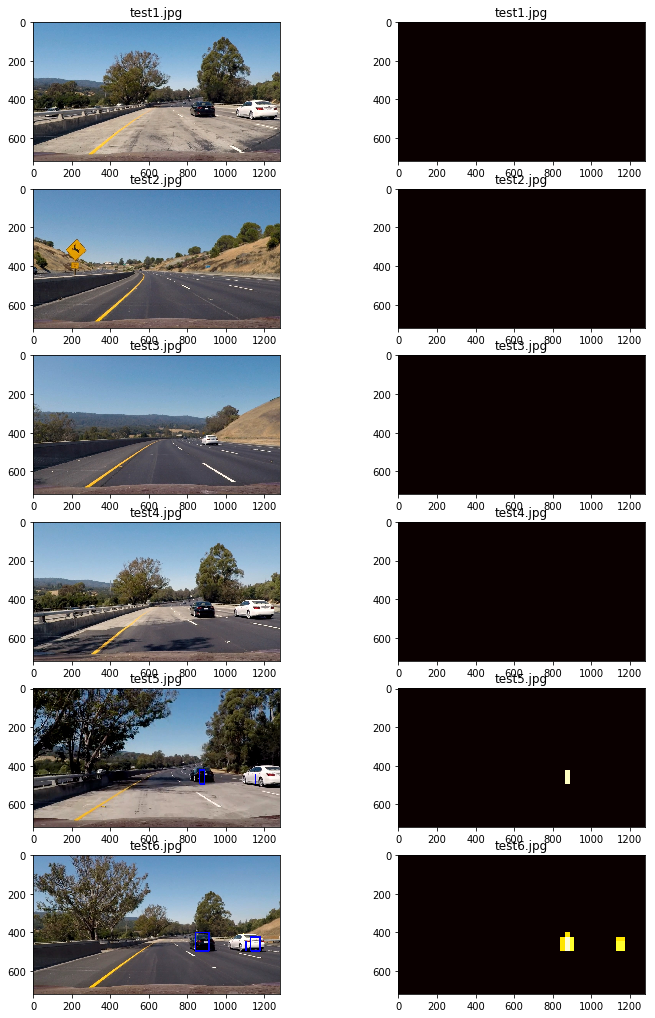

In [62]:
import os
import warnings
from scipy.ndimage.measurements import label
warnings.filterwarnings('ignore')

out_images = []
out_map = []
# out_titles =[]
out_boxes = []
#consider a narrower swath in y
ystart = 400
ystop = 656
scale = 1.5
for img_src in image_files:
    img = mpimg.imread(img_src)
    out_img, heatmap = vd.find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
#     labels = label(heatmap)
    vd.heatmaps.append(heatmap)
    intergrated_heat_maps = np.sum(vd.heatmaps, axis=0)
    threshold_heat_map = vd.apply_threshold(intergrated_heat_maps,vd.heat_threshold)
    labels = label(threshold_heat_map)

    draw_image = vd.draw_labeled_bboxes(np.copy(img), labels)
    out_images.append(draw_image)
    out_images.append(intergrated_heat_maps)
    cv2.imwrite('output_images/'+ img_src.split('/')[1], draw_img)

fig = plt.figure(figsize=(12,24))
vd.visualise(fig,8,2,out_images,out_titles)

In [63]:
def process_image(img):
    out_image, heat_map = vd.find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    draw_image = vd.draw_labeled_bboxes(np.copy(img), labels)
    # Draw bounding boxes on a copy of the image
#     draw_image = vd.draw_labeled_bboxes(np.copy(img), labels)
    return draw_image

In [1]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [2]:
from vehicle_detection import Vehicle_Detection
vd = Vehicle_Detection(xstart=700, ystart=400,threshold_factor=60, heat_threshold=220, scales=[1],cnn_predict=True)
output_video2 = 'output_images/project_video_DL1.mp4'
clip1 = VideoFileClip("project_video.mp4")
video_clip = clip1.fl_image(vd.process_image) #NOTE: this function expects color images!!
%time video_clip.write_videofile(output_video2, audio=False)

Using TensorFlow backend.


[MoviePy] >>>> Building video output_images/project_video_DL1.mp4
[MoviePy] Writing video output_images/project_video_DL1.mp4


100%|█████████▉| 1260/1261 [34:29<00:01,  1.60s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_images/project_video_DL1.mp4 

CPU times: user 33min 8s, sys: 2min 27s, total: 35min 35s
Wall time: 34min 33s


In [3]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output_video2))